In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'figures' folder exists
if not os.path.exists("figures"):
    os.makedirs("figures")

# Define consistent figure size
FIGURE_SIZE = (8, 6)

def runge_kutta_4(time, biomass, substrate, yield_factor, step_size, mu_max, Ks, volume, flow_rate, substrate_feed, steps):
    """
    Simulate the dynamic behavior of a Continuous Stirred Tank Bioreactor (CSTR) using 
    the fourth-order Runge-Kutta method.

    (Documentation remains the same as in your original code.)
    """
    dilution_rate = flow_rate / volume  # Dilution rate (h^-1)
    results = []

    for _ in range(steps):
        # Calculate growth rate
        growth_rate = mu_max * substrate / (Ks + substrate)

        # Differential equations
        dx_dt = biomass * (growth_rate - dilution_rate)
        ds_dt = dilution_rate * (substrate_feed - substrate) - (growth_rate * biomass / yield_factor)

        # Runge-Kutta calculations
        k1_x = step_size * dx_dt
        k1_s = step_size * ds_dt

        k2_x = step_size * (biomass + k1_x / 2) * (mu_max * (substrate + k1_s / 2) / (Ks + (substrate + k1_s / 2)) - dilution_rate)
        k2_s = step_size * (
            dilution_rate * (substrate_feed - (substrate + k1_s / 2))
            - (mu_max * (substrate + k1_s / 2) / (Ks + (substrate + k1_s / 2))) * (biomass + k1_x / 2) / yield_factor
        )

        k3_x = step_size * (biomass + k2_x / 2) * (mu_max * (substrate + k2_s / 2) / (Ks + (substrate + k2_s / 2)) - dilution_rate)
        k3_s = step_size * (
            dilution_rate * (substrate_feed - (substrate + k2_s / 2))
            - (mu_max * (substrate + k2_s / 2) / (Ks + (substrate + k2_s / 2))) * (biomass + k2_x / 2) / yield_factor
        )

        k4_x = step_size * (biomass + k3_x) * (mu_max * (substrate + k3_s) / (Ks + (substrate + k3_s)) - dilution_rate)
        k4_s = step_size * (
            dilution_rate * (substrate_feed - (substrate + k3_s))
            - (mu_max * (substrate + k3_s) / (Ks + (substrate + k3_s))) * (biomass + k3_x) / yield_factor
        )

        # Update variables
        time += step_size
        biomass += (1 / 6) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x)
        substrate += (1 / 6) * (k1_s + 2 * k2_s + 2 * k3_s + k4_s)

        # Store results
        results.append([time, biomass, substrate, growth_rate])

    # Convert results to DataFrame
    df = pd.DataFrame(results, columns=["Time (h)", "Biomass (g/L)", "Substrate (g/L)", "Growth Rate (1/h)"])
    return df

def plot_biomass_vs_substrate(df):
    """
    Plot Biomass vs Substrate concentration (Phase Diagram).

    Args:
        df (pd.DataFrame): DataFrame with columns for time, biomass, and substrate.
    """
    plt.figure(figsize=FIGURE_SIZE)
    plt.plot(df["Biomass (g/L)"], df["Substrate (g/L)"], linestyle="--", color="b")
    plt.xlabel("Biomass (g/L)")
    plt.ylabel("Substrate (g/L)")
    plt.title("Biomass vs Substrate (Phase Diagram)")
    plt.grid(True)
    plt.savefig("figures/biomass_vs_substrate.png")
    plt.show()

def plot_biomass_and_substrate_vs_time(df):
    """
    Plot Biomass and Substrate concentration over time.

    Args:
        df (pd.DataFrame): DataFrame with columns for time, biomass, and substrate.
    """
    fig, ax1 = plt.subplots(figsize=FIGURE_SIZE)

    ax1.set_xlabel("Time (h)")
    ax1.set_ylabel("Biomass (g/L)", color="g")
    ax1.plot(df["Time (h)"], df["Biomass (g/L)"], linestyle="--", color="g")
    ax1.tick_params(axis="y", labelcolor="g")

    ax2 = ax1.twinx()
    ax2.set_ylabel("Substrate (g/L)", color="b")
    ax2.plot(df["Time (h)"], df["Substrate (g/L)"], linestyle="--", color="b")
    ax2.tick_params(axis="y", labelcolor="b")

    plt.title("Biomass and Substrate vs Time")
    plt.grid(True)
    plt.savefig("figures/biomass_and_substrate_vs_time.png")
    plt.show()

def plot_growth_rate_vs_time(df):
    """
    Plot Growth Rate over time.

    Args:
        df (pd.DataFrame): DataFrame with columns for time and growth rate.
    """
    plt.figure(figsize=FIGURE_SIZE)
    plt.plot(df["Time (h)"], df["Growth Rate (1/h)"], linestyle="--", color="r")
    plt.xlabel("Time (h)")
    plt.ylabel("Growth Rate (1/h)")
    plt.title("Growth Rate vs Time")
    plt.grid(True)
    plt.savefig("figures/growth_rate_vs_time.png")
    plt.show()

,Time (h),Biomass (g/L),Substrate (g/L),Growth Rate (1/h)
0,0.1,0.102851,20.290814,0.380952
1,0.2,0.105785,20.578509,0.381213
2,0.3,0.108806,20.863110,0.381463
3,0.4,0.111916,21.144642,0.381704
4,0.5,0.115118,21.423127,0.381937
...,...,...,...,...
95,9.6,1.567631,35.454530,0.389020
96,9.7,1.613601,35.476123,0.389027
97,9.8,1.660921,35.493887,0.389034
98,9.9,1.709629,35.507757,0.389039


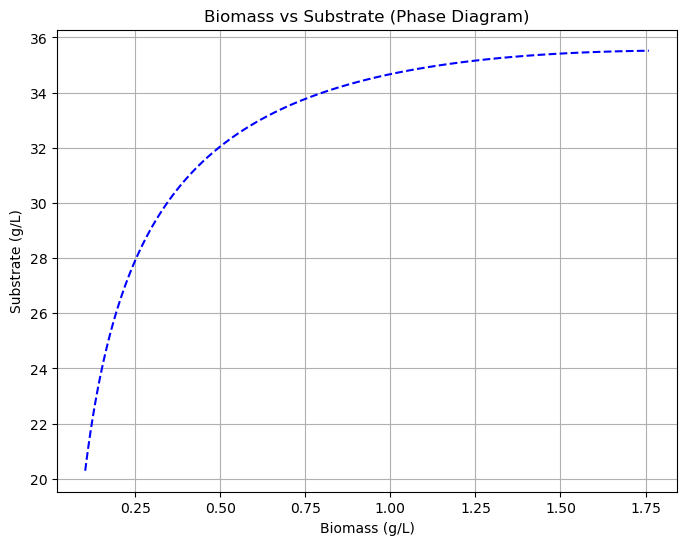

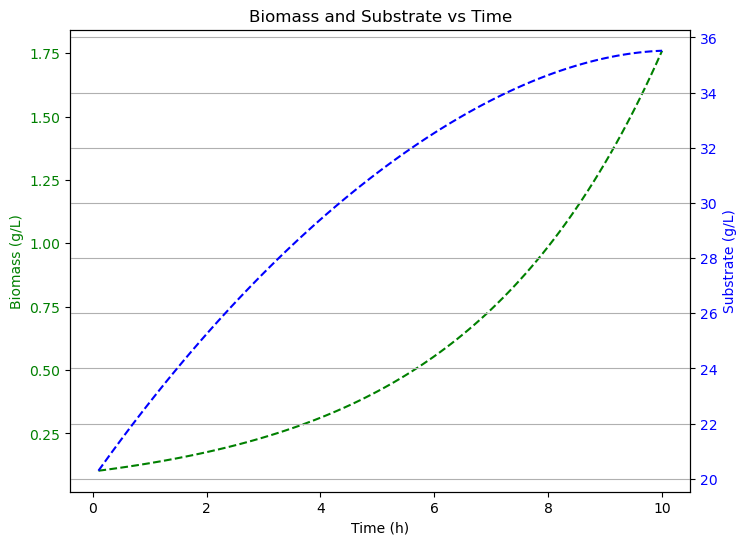

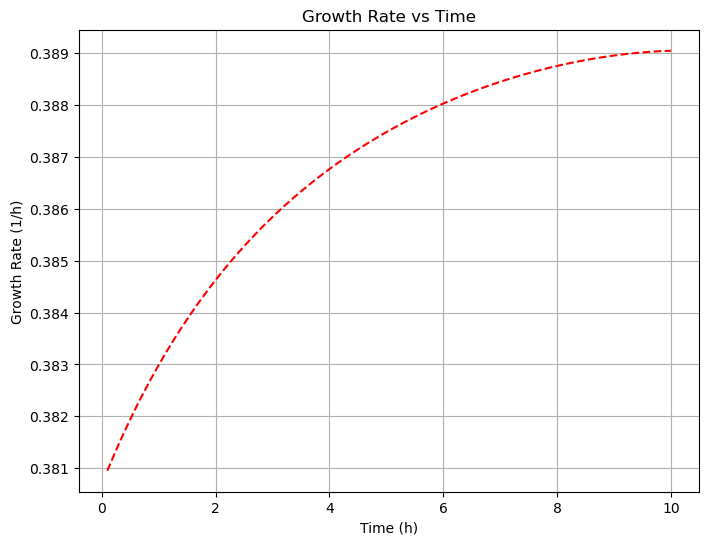

In [7]:
# Define the input variables
# Reactor conditions and simulation parameters
initial_time = 0.0          # Initial time (hours)
initial_biomass = 0.1       # Initial biomass concentration (g/L)
initial_substrate = 20.0    # Initial substrate concentration (g/L)
yield_coefficient = 0.5     # Biomass yield coefficient (g biomass/g substrate)
step_size = 0.1             # Simulation step size (hours)
mu_max = 0.4                # Maximum specific growth rate (1/h)
Ks = 1.0                    # Substrate affinity constant (g/L)
reactor_volume = 1.0        # Reactor volume (L)
flow_rate = 0.1             # Feed flow rate (L/h)
substrate_feed = 50.0       # Substrate concentration in feed (g/L)
simulation_steps = 100      # Number of steps to simulate

# Run the simulation
simulation_results = runge_kutta_4(
    time=initial_time,
    biomass=initial_biomass,
    substrate=initial_substrate,
    yield_factor=yield_coefficient,
    step_size=step_size,
    mu_max=mu_max,
    Ks=Ks,
    volume=reactor_volume,
    flow_rate=flow_rate,
    substrate_feed=substrate_feed,
    steps=simulation_steps,
)

# Display the first few rows of the simulation results
display(simulation_results)

# Generate plots
plot_biomass_vs_substrate(simulation_results)         # Biomass vs Substrate (Phase Diagram)
plot_biomass_and_substrate_vs_time(simulation_results) # Biomass and Substrate vs Time
plot_growth_rate_vs_time(simulation_results)          # Growth Rate vs Time